In [3]:
import pandas as pd
import numpy as np
import json
from urllib.request import urlopen
import json
from tqdm import tqdm
import time
import numpy as np

In [4]:
def getSolrResponse():
    start_time1 = time.time() 
   # query_solr = question.replace(" ","%20")
    connection = urlopen('http://nausd-lapp0350.chubb.com:8983/solr/MRC_Database/select?q=*%3A*&rows=200000&wt=json')
    response = json.load(connection)
    end_time1=time.time()
    #print("Solr response time",end_time1-start_time1)
    #print (response['response']['numFound'], "documents found.")
    #print(len(response['response']['docs']))
    start_time = time.time()  
    # Print the name of each document.
    #print(len(response['response']['docs']))
    result_df=pd.DataFrame()
     
    for document in response['response']['docs']:
        result_dict={}
        #print(json.dumps(document, indent = 1))
        Final_String = ' '.join(map(str, document['text']))
        result_dict["text"]=Final_String
        #print(json.dumps(Final_String, indent = 1))
        
        try: 
            if(document['filename']):
                result_dict["Filename"]=document['filename']
            else:
                result_dict["Filename"]=""
                
            if(document['URL_Link']):
                result_dict["URL_Link"]=document['URL_Link']
            else:
                result_dict["URL_Link"]=""            
           
            if(document['Content_Title']):   
                result_dict["Content_Title"]=document['Content_Title']
            else:
                result_dict["Content_Title"]=""
            if document['Content_Description']:
                result_dict["Content_Description"]=document['Content_Description']
            else:
                result_dict["Content_Description"]=""
                
            # result_dict['Solr_Score'] = document['score']
            result_df = result_df.append(result_dict, ignore_index=True)
            
        except KeyError:
            continue
        #print("--- %s is the execution time in seconds ---" % (time.time() - start_time))
    result_df.reset_index(drop=True, inplace=True)
    return result_df

In [5]:
alldocs_df = getSolrResponse()

In [6]:
alldocs_df

,Content_Description,Content_Title,Filename,URL_Link,text
0,[This playbook supports the development of sta...,[Managing Client Service Relationships Playbook],[rx56392.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,Edition: 08 -2014 Page | 1 MANAGING CLIENT SER...
1,[Purpose: To advise the field of the implement...,[CMQ: South Carolina Windstorm Loss Mitigation...,[rx33224.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,PUBLISH DATE: 06/01/08 Revised 08/15/08 Catego...
2,[Property Coverage- Condominium Unit Owner Los...,[Condominium Unit Owner Loss Assessment Premis...,[rx61797.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,This Endorsement applies to the following form...
3,[Kopy Kit sheet to distribute to insureds and ...,[101 Stress Relievers],[rx61947.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,Distributed under license © Parlay Internation...
4,[Processing Center Culture of Quality Mission ...,[Culture of Quality Mission],[rx52363.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,CCCCII PPrroocceessssiinngg CCeenntteerr The m...
...,...,...,...,...,...
13350,[Purpose: To communicate a CUW Processing Cent...,[CV: CUW IM - Processing Center Work Order Rea...,[rx70595.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,O PUBLISH DATE: 04/22 /20 Division: CI Major L...
13351,[This is the CAT form on the Customarq Form Re...,[Additional Peril - Combined Earthquake/EQSL L...,[rx64843.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,This document is for the exclusive use of the ...
13352,[Life Sciences Vascular Devices Guidance Memo],[Vascular Devices Guidance],[rx65423.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,Confidential Do No t Distribute Outside Chubb ...
13353,[This is a Chubb Fine Arts webcast - slides an...,[Chubb Fine Arts Webcast Slides],[rx46670.pdf],[https://nae2paasap0117.naasedigital.chubb.com...,"The ABC™s of Fine Arts October 18, 2011 Discla..."


In [7]:
import nltk
nltk_data="/home/maghosh/share/MRC/models/nltk"
nltk.data.path.append(nltk_data)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
nltk.download('stopwords')



def build_list(alldocs_df,col="text"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= alldocs_df[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus


Bad key savefig.frameon in file /opt/app/aip/anaconda3/envs/python37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/app/aip/anaconda3/envs/python37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/app/aip/anaconda3/envs/python37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or

<AxesSubplot:>

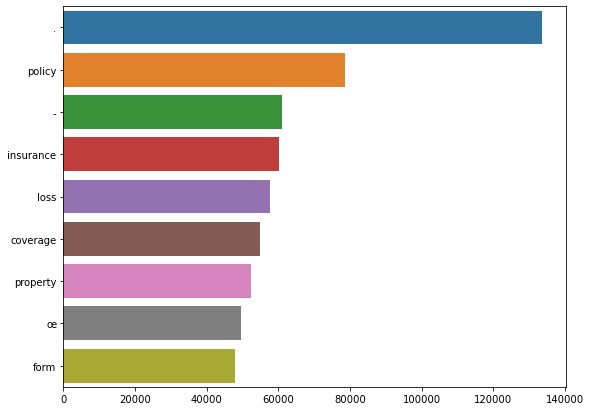

In [8]:
stop=set(stopwords.words('english'))
corpus=build_list(alldocs_df,"text")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

of the 79444
in the 71888
to the 65401
on the 32439
80 02 30519
for the 27124
the following 21926
to be 20432
of insurance 20003
will be 19319
the policy 18197
from the 17097
by the 16831
loss or 16571
shown in 16468
with the 16438
or damage 16354
of business 16249
does not 15922
and the 15729


 PRINTING THE TOP 20 BIGRAMS


<AxesSubplot:title={'center':'Top 20 words '}, xlabel='Word'>

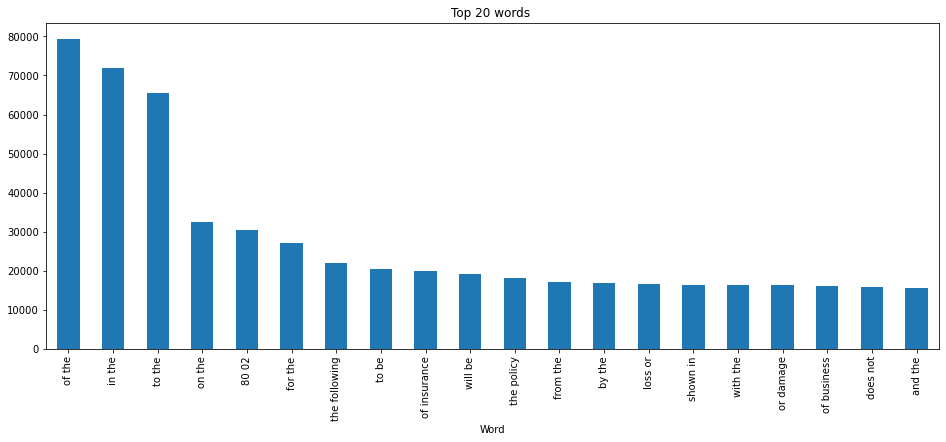

In [9]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), min_df=2).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(alldocs_df.text, 20)
for word, freq in common_words:
    print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print('\n\n PRINTING THE TOP 20 BIGRAMS')
top_words.groupby('Word').sum()['Count'].sort_values(ascending=False).plot(figsize=(16,6), kind='bar', title='Top 20 words ')

# with Pre-Processing

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


import re
#from bs4 import BeautifulSoup

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

stopwords= set(['br', 'the', 'i', 'me', 'my', 'm' ,'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'hi', 'hello','he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't","from","to","wa","ha",'also','known','does','of'])

In [11]:
import re
#from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Cleaning Texts of Train Dataset

# Combining all the above stundents 
from tqdm import tqdm
summary_clean = []
# tqdm is for printing the status bar
for sentance in tqdm(alldocs_df['text'].values):
    sentance = str(sentance)
    sentance = replace_contractions(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    #sentance = lemma_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    summary_clean.append(sentance[:1200].strip())

[nltk_data] Downloading package wordnet to /home/dichowd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 13355/13355 [00:59<00:00, 225.16it/s]


In [12]:
all_docs_df = pd.DataFrame({'url':list(alldocs_df.URL_Link),'title':list(alldocs_df.Content_Title),'text':summary_clean})
all_docs_df

,url,title,text
0,[https://nae2paasap0117.naasedigital.chubb.com...,[Managing Client Service Relationships Playbook],edition page managing client service relations...
1,[https://nae2paasap0117.naasedigital.chubb.com...,[CMQ: South Carolina Windstorm Loss Mitigation...,publish date revised categories customarq cmq ...
2,[https://nae2paasap0117.naasedigital.chubb.com...,[Condominium Unit Owner Loss Assessment Premis...,endorsement applies following forms schedule p...
3,[https://nae2paasap0117.naasedigital.chubb.com...,[101 Stress Relievers],distributed license parlay international licen...
4,[https://nae2paasap0117.naasedigital.chubb.com...,[Culture of Quality Mission],ccccii pprroocceessssiinngg cceenntteerr miss ...
...,...,...,...
13350,[https://nae2paasap0117.naasedigital.chubb.com...,[CV: CUW IM - Processing Center Work Order Rea...,publish date division ci major line business p...
13351,[https://nae2paasap0117.naasedigital.chubb.com...,[Additional Peril - Combined Earthquake/EQSL L...,document exclusive use employees chubb son chu...
13352,[https://nae2paasap0117.naasedigital.chubb.com...,[Vascular Devices Guidance],confidential no distribute outside chubb novem...
13353,[https://nae2paasap0117.naasedigital.chubb.com...,[Chubb Fine Arts Webcast Slides],abc fine arts october disclaimer views informa...


In [13]:
#Actual text
#max(all_docs_df.text.apply(len))

In [14]:
max(all_docs_df.text.apply(len))

1200

support date 4559
effective date 3846
date policy 3707
system support 3418
publish date 3102
talking points 3078
action required 2910
effective system 2851
internal use 2640
workers compensation 2635
date categories 2588
ua uw 2540
urgency role 2337
role priority 2327
audience role 2326
role audience 2318
priority urgency 2310
inventory specialist 2303
liability insurance 2276
date purpose 2269


 PRINTING THE TOP 20 BIGRAMS


<AxesSubplot:title={'center':'Top 20 words '}, xlabel='Word'>

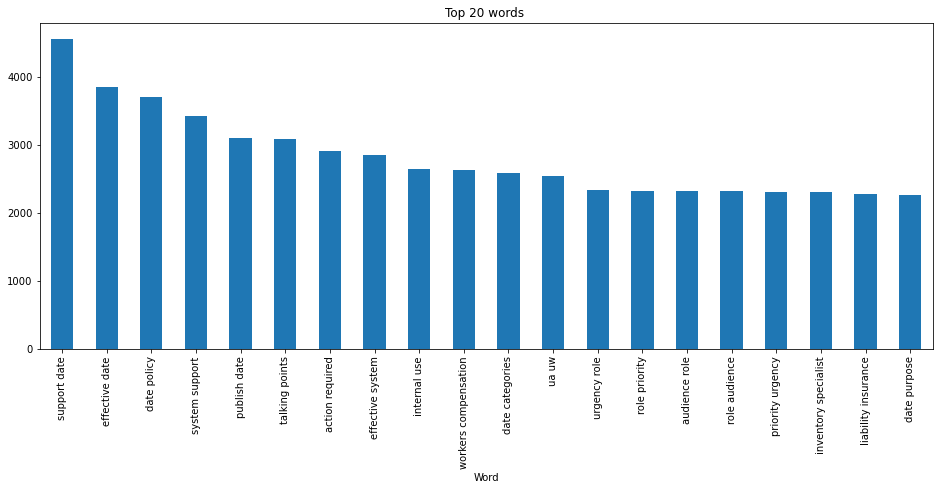

In [15]:
common_words = get_top_n_words(all_docs_df.text, 20)
for word, freq in common_words:
    print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print('\n\n PRINTING THE TOP 20 BIGRAMS')
top_words.groupby('Word').sum()['Count'].sort_values(ascending=False).plot(figsize=(16,6), kind='bar', title='Top 20 words ')

In [18]:
common_words = get_top_n_words(all_docs_df.text)
# for word, freq in common_words:
#     print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
top_words

,Word,Count
0,support date,4559
1,effective date,3846
2,date policy,3707
3,system support,3418
4,publish date,3102
...,...,...
164662,lscntl press,2
164663,im processing,2
164664,determine order,2
164665,control visit,2


# Select Focused Keywords

In [29]:
keywords = ['Coverages','Deductibles','Exclusions','Industry Practice']

keywords_bigram_df = top_words[top_words.Word.str.contains(('|'.join(keywords)),case=False)]
keywords_bigram_df.to_csv('/opt/app/aip/home/share/MRC/data/extracted_features/keywords_bigram_df.csv',index=False)
keywords_bigram_df

,Word,Count
155,premises coverages,558
247,additional coverages,429
470,coverages shown,249
494,additional exclusions,237
590,policy exclusions,196
...,...,...
164000,expandanycoverages underthiscontract,2
164074,coverages provision,2
164077,crimecoveragelimitofinsurance thefollowingdisp...,2
164078,thefollowingdisplaysthecoveragesprovidedundert...,2


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dichowd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot:>

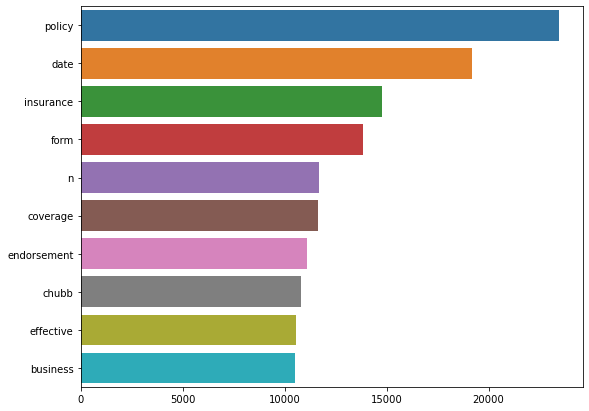

In [14]:
import nltk
nltk_data="/home/maghosh/share/MRC/models/nltk"
nltk.data.path.append(nltk_data)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
nltk.download('stopwords')



def build_list(alldocs_df,col="text"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= alldocs_df[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

corpus=build_list(all_docs_df,"text")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)

system support date 2881
effective system support 2808
publish date categories 2583
urgency role audience 2309
role audience role 2306
audience role priority 2300
role priority urgency 2296
information talking points 2134
support date policy 2072
usa inventory specialist 2042
business critical action 2037
critical action required 2036
action required information 2034
required information talking 1943
template support date 1615
support date purpose 1568
policy effective date 1360
date policy number 1358
specialist ua uw 1340
priority urgency csr 1338


 PRINTING THE TOP 20 TRIGRAMS


<AxesSubplot:title={'center':'Top 20 words '}, xlabel='Word'>

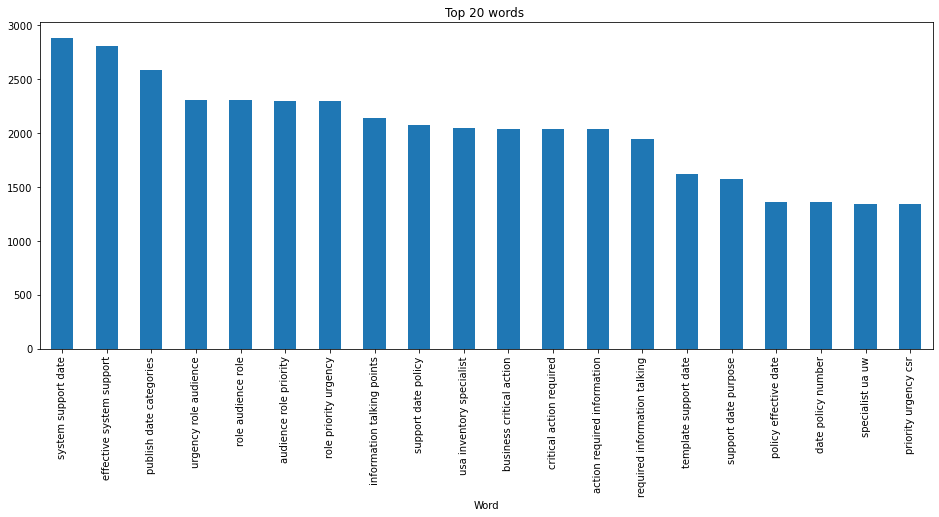

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), min_df=2).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(all_docs_df.text, 20)
for word, freq in common_words:
    print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print('\n\n PRINTING THE TOP 20 TRIGRAMS')
top_words.groupby('Word').sum()['Count'].sort_values(ascending=False).plot(figsize=(16,6), kind='bar', title='Top 20 words ')

In [32]:
common_words = get_top_n_words(all_docs_df.text)
# for word, freq in common_words:
#     print(word, freq)

top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
print(top_words)

keywords = ['Coverages','Deductibles','Exclusions','Authority']

keywords_trigram_df = top_words[top_words.Word.str.contains(('|'.join(keywords)),case=False)]
#keywords_trigram_df.to_csv('/opt/app/aip/home/share/MRC/data/extracted_features/keywords_trigram_df.csv',index=False)
keywords_trigram_df


                            Word  Count
0            system support date   2881
1       effective system support   2808
2        publish date categories   2583
3          urgency role audience   2309
4             role audience role   2306
...                          ...    ...
153578         cuw im processing      2
153579      im processing center      2
153580        loss control visit      2
153581     history analyzer loss      2
153582     analyzer loss history      2

[153583 rows x 2 columns]


,Word,Count
571,coverages additional coverages,138
599,premises coverages additional,129
701,page section exclusions,107
849,applicable coverages shown,90
887,following premises coverages,86
...,...,...
153260,coverages commercial cis,2
153278,additional exclusions contractors,2
153279,exclusions contractors equipment,2
153280,contractors equipment exclusions,2


# BIGRAMS with TFIDF

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_tfidf_scores(corpus,n):
    vectorizer = CountVectorizer(ngram_range =(n, n))
    X1 = vectorizer.fit_transform(corpus) 
    features = (vectorizer.get_feature_names())
    #print("\n\nX1 : \n", X1.toarray())
# Applying TFIDF
# You can still get n-grams here
    vectorizer = TfidfVectorizer(ngram_range = (n, n))
    X2 = vectorizer.fit_transform(corpus)
    scores = (X2.toarray())
    #print("\n\nScores : \n", scores)

    # Getting top ranking features
    sums = X2.sum(axis = 0)
    data1 = []
    for col, term in enumerate(features):
        data1.append( (term, sums[0, col] ))
    ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
    words = (ranking.sort_values('rank', ascending = False))
    print ("\n\nWords : \n", words.head(7))
    return words.reset_index(drop=True)

In [73]:
common_words = get_tfidf_scores(all_docs_df.text,2)
# for word, freq in common_words:
#     print(word, freq)

# top_words = pd.DataFrame(common_words, columns = ['Word' , 'Count'])
# print(top_words)

#keywords = ['Coverages','Deductibles','Exclusions','Authority']
keywords = ['Occupancy','Coverages','Exposures']

keywords_trigram_df = common_words[common_words.term.str.contains(('|'.join(keywords)),case=False)]
keywords_trigram_df.to_csv('/opt/app/aip/home/share/MRC/data/extracted_features/keywords_bigram_tfidf_v2.csv',index=False)
keywords_trigram_df




Words : 
                         term        rank
545204          support date  120.064418
177643        effective date   96.081360
616625  workers compensation   95.772685
311243   liability insurance   92.392675
143925           date policy   91.032429
549407        system support   89.479943
620019       writing company   84.202048


,term,rank
173,premises coverages,27.955810
293,additional coverages,20.795943
467,coverages shown,13.618505
761,coverages additional,9.155704
1049,coverages apply,7.092425
...,...,...
622148,occupancy nfpa,0.044984
622176,edition occupancy,0.044984
623467,exposures defined,0.037329
623882,audit coverages,0.034552


In [70]:
keywords_trigram_df.to_csv('/opt/app/aip/home/share/MRC/data/extracted_features/keywords_trigram_tfidf.csv',index=False)

In [35]:
# from wordcloud import WordCloud

# def display_wordCloud(train, title = None):
#     wordcloud = WordCloud(background_color = 'black',
#                          stopwords = stopwords,
#                          max_words = 100,
#                          max_font_size = 35,
#                          scale = 2,
#                          random_state = 1).generate(str(train))
#     fig = plt.figure(1,figsize = (15,15))
#     plt.axis('off')
#     if title:
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)
#     plt.imshow(wordcloud)
#     plt.show()

# display_wordCloud(all_docs_df.text,'Most Common Words ')

# Extarcting S-O-R

In [37]:
import spacy
spacy_path="/home/maghosh/share/MRC/models/en_core_web_lg-2.1.0/en_core_web_lg/en_core_web_lg-2.1.0"
nlp=spacy.load(spacy_path)


def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

  #############################################################
  
    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
          # check: token is a compound word or not
          if tok.dep_ == "compound":
            prefix = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                   prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
        if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text

          ## chunk 3
        if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      

          ## chunk 4
        if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text

          ## chunk 5  
          # update variables
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
  #############################################################

    return [ent1.strip(), ent2.strip()]

In [6]:
from spacy.matcher import Matcher 
def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [82]:
def get_text_list(df):
    texts=[]
    for i in df.index: # summary_df was previous
        texts.append(df.iloc[i]['text'])
    texts=list(map(clean,texts))
    text_list=' '.join(texts)
    return text_list

import re
def clean(txt):
    txt=re.sub(r'\n','',txt)
    txt=re.sub(r'\([^()]*\)','',txt)
    txt=re.sub(r'https?:','',txt)
    return txt

texts=list(map(clean,texts))
text_list=' '.join(texts)

In [83]:
#nlp.max_length = 101994268
def prepare_df(df):
    text_list= get_text_list(df)
    #print(text_list)
    #doc=nlp(text_list)
    #print(doc)
    prep_df=pd.DataFrame()
    for index,row in df.iterrows():
        doc=nlp(row['text'])
        print(row['Filename'])
        #print(get_entities(str(doc.sents)))
        #print(get_relation(str(doc.sents)))
        #print(str(doc.sents))
        for sent in list(doc.sents):
            sub,obj = get_entities(str(sent))
            relation= get_relation(str(sent))

            if ((relation!='') & (sub!='') &(obj!='')):
                prep_df=prep_df.append({'subject':sub,'relation':relation,'object':obj,'filename':row['Filename']},ignore_index=True)

    return prep_df

In [84]:
output_df = prepare_df(alldocs_df)

['rx56392.pdf']
['rx33224.pdf']
['rx61797.pdf']
['rx61947.pdf']
['rx52363.pdf']
['rx66981.pdf']
['rx36460.pdf']
['rx46304.pdf']
['rx8319.pdf']
['rx32901.pdf']
['rx69999.pdf']
['rx45738.pdf']
['rx29927.pdf']
['rx54678.pdf']
['rx61145.pdf']
['rx45716.pdf']
['rx67201.pdf']
['rx15036.pdf']
['rx41786.pdf']
['rx65046.pdf']
['rx69221.pdf']
['rx8637.pdf']
['rx30316.pdf']
['rx69314.pdf']
['rx57316.pdf']
['rx51755.pdf']
['rx67406.pdf']
['rx62076.pdf']
['rx48961.pdf']
['rx33091.pdf']
['rx13427.pdf']
['rx60215.pdf']
['rx69076.pdf']
['rx8762.pdf']
['rx66569.pdf']
['rx50370.pdf']
['rx36994.pdf']
['rx37462.pdf']
['rx54644.pdf']
['rx2229.pdf']
['rx65416.pdf']
['rx68853.pdf']
['rx4469.pdf']
['rx33757.pdf']
['rx31934.pdf']
['rx42057.pdf']
['rx66513.pdf']
['rx25293.pdf']
['rx54641.pdf']
['rx21044.pdf']
['rx52522.pdf']
['rx64848.pdf']
['rx12307.pdf']
['rx27993.pdf']
['rx32426.pdf']
['rx38084.pdf']
['rx17729.pdf']
['rx15072.pdf']
['rx60018.pdf']
['rx21824.pdf']
['rx69387.pdf']
['rx16390.pdf']
['rx35611.pdf

In [91]:
#output_df.to_csv('output/KG/knowledge_graph_sor_v4_all.csv',index= False)

In [34]:
#output_df = pd.read_csv('output/KG/knowledge_graph_sor_v4_all.csv')
output_df

,filename,object,relation,subject
0,['rx56392.pdf'],early 2014,is,direct Client Service that
1,['rx56392.pdf'],seasoned client service experience,attended,Twenty -three
2,['rx56392.pdf'],document,listed at,attendees
3,['rx56392.pdf'],1,were to,specific objectives
4,['rx56392.pdf'],different ways,used in,Playbook
...,...,...,...,...
473351,['rx32423.pdf'],subject terrorism law,include,property casualty that
473352,['rx32423.pdf'],United America,means,State State
473353,['rx32423.pdf'],Inc. Insurance Services permission,Includes,12 Endorsement Page
473354,['rx32423.pdf'],Risk Insurance 2002,means,Law Terrorism law


In [46]:
output_df_x =  output_df.dropna()

In [75]:
#keywords = ['Coverages','Deductibles','Exclusions','Industry Practice']
keywords = ['Occupancy']
keywords_sor_df = output_df_x[output_df_x.object.str.contains(('|'.join(keywords)),case=False)| output_df_x.subject.str.contains(('|'.join(keywords)),case=False)]

#keywords_sor_df = output_df_x[output_df_x.object.str.contains(('|'.join(keywords)),case=False)| output_df_x.subject.str.contains(('|'.join(keywords)),case=False)]
#keywords_sor_df.to_csv('/opt/app/aip/home/share/MRC/data/extracted_features/keywords_sor_df.csv',index=False)
keywords_sor_df

,filename,object,relation,subject
311,['rx32901.pdf'],inherent occupancy,taken,inherent Action Action
13253,['rx12707.pdf'],agai occupancy,do many,Private Protection Insureds
13327,['rx12707.pdf'],this,be adequate,occupancy
13367,['rx12707.pdf'],previous occupancy,is,so system
13391,['rx12707.pdf'],flammable site,am ount,occupancy hazard which
...,...,...,...,...
463222,['rx61823.pdf'],occupancy classification,is,t he
463228,['rx61823.pdf'],piping NFPA occupancy,allow,Comparing
463304,['rx61823.pdf'],required occupancy hazard,is,job
463348,['rx61823.pdf'],specific pipe,system in,given occupancy number


In [19]:
import networkx as nx

def draw_kg(pairs,c1='red',c2='blue',c3='orange'):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
  
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(50, 40), dpi=80)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=20,
        linewidths=1.5,
        pos=layout,
        edge_color=c1,
        edgecolors=c2,
        node_color=c3,
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()

In [21]:
df = prepare_df(text_list)
#draw_kg(df) # For NetworkX graph 

In [22]:
df

,object,relation,subject
0,,Edition,
1,,Edition,
2,,|,
3,,Contributors,
4,,Edition,
5,,Relationships,
6,,Playbook,
7,,humility,
8,,is,competitive feature
9,early 2014,is,direct Client Service that


In [17]:
df.to_csv('output/KG/knowledge_graph_sor_v2.csv', index = False)

In [ ]:
import gc
gc.collect()

In [ ]:
df.isnull().sum()

In [46]:
kg_df = pd.read_csv('output/KG/knowledge_graph_sor_v2.csv')
kg_df

,object,relation,subject
0,fred champion annmarie,tiberia,edition page edition page tom
1,smith tiffany caselli,marks,feeley jones keith
2,seasoned chubb risk meeting,led,direct outcome meeting
3,complex address accounts,shared,specific objectives meeting
4,number,publish best,future reference playbook
...,...,...,...
64975,property insurance exclusion,continued,copyrighted inc permission endorsement
64976,certain fire losses,exception certain,certified acts terrorism
64977,certified acts terrorism,includes,continued rev endorsement page
64978,contra schedule premises,includes,continued rev endorsement page


In [38]:
kg_df.isnull().sum()

object      38350
relation        0
subject     37125
dtype: int64

In [45]:
#kg_df.dropna().reset_index(drop=True).to_csv('output/KG/knowledge_graph_sor_v2.csv',index= False)